# Kaggle - nivel 1

## Segundo Modelo - Decision tree

seguimos con la competición Titanic Challenge visto en el punto 1

rev. 04-16-2020

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [5]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 1.0.3
sklearn: 0.22.2.post1


***

## Import Libraries

In [6]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Save the model
import pickle
import joblib


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


***

## Load dataset

Kaggle we provide two datasets: train and test in csv extension. So, we check and analyze only train file.

In [7]:
# Load dataset train and test
train_titanic = pd.read_csv('train_titanic.csv')
test_titanic = pd.read_csv('test_titanic.csv')

In [8]:
train_titanic.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,0,3,True,1,0,S,2,0,A,False,N,r1,Student,Mr
1,1,1,False,1,0,C,2,0,D,True,C,r3,Adult,Mrs
2,1,3,False,0,0,S,1,1,B,False,N,r1,Young Adult,Miss
3,1,1,False,1,0,S,2,0,D,True,C,r4,Young Adult,Mrs
4,0,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
5,0,3,True,0,0,Q,1,1,B,False,N,r1,Unknown,Mr
6,0,1,True,0,0,S,1,1,D,True,E,r1,Adult,Mr
7,0,3,True,3,1,S,5,0,C,False,N,r1,Baby,Master
8,1,3,False,0,2,S,3,0,B,False,N,r1,Young Adult,Mrs
9,1,2,False,1,0,C,2,0,C,False,N,r1,Teenager,Mrs


In [9]:
test_titanic.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,892,3,True,0,0,Q,1,1,A,False,N,r1,Student,Mr
1,893,3,False,1,0,S,2,0,A,False,N,r1,Adult,Mrs
2,894,2,True,0,0,Q,1,1,B,False,N,r1,Young Adult,Mr
3,895,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
4,896,3,False,1,1,S,3,0,B,False,N,r1,Young Adult,Mrs
5,897,3,True,0,0,S,1,1,B,False,N,r1,Unknown,Mr
6,898,3,False,0,0,Q,1,1,A,False,N,r1,Adult,Miss
7,899,2,True,1,1,S,3,0,C,False,N,r1,Baby,Mr
8,900,3,False,0,0,C,1,1,A,False,N,r1,Young Adult,Mrs
9,901,3,True,2,0,S,3,0,C,False,N,r1,Teenager,Mr


* * *

### Training and Validation dataset

In [10]:
PassengerId = test_titanic['PassengerId']
train = train_titanic
val = test_titanic.drop('PassengerId', axis=1).copy()

In [11]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [12]:
val

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,3,True,0,0,Q,1,1,A,False,N,r1,Student,Mr
1,3,False,1,0,S,2,0,A,False,N,r1,Adult,Mrs
2,2,True,0,0,Q,1,1,B,False,N,r1,Young Adult,Mr
3,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
4,3,False,1,1,S,3,0,B,False,N,r1,Young Adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,True,0,0,S,1,1,B,False,N,r1,Unknown,Mr
414,1,False,0,0,C,1,1,D,True,C,r4,Adult,Rare
415,3,True,0,0,S,1,1,A,False,N,r1,Unknown,Mr
416,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr


* * *

## Scaling with StandardScaler

We made scaling by StandarScaler and evaluate results to first approach.
`SibSp`, `Parch`, `FamilySize`

In [13]:
dataset = [train, val]

In [14]:
col_Z = ['SibSp', 'Parch', 'FamilySize']

In [15]:
features = dataset[0][col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [16]:
dataset[0][col_Z] = features
dataset[0].head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,0,3,True,0.432793,-0.473674,S,0.059160,0,A,False,N,r1,Student,Mr
1,1,1,False,0.432793,-0.473674,C,0.059160,0,D,True,C,r3,Adult,Mrs
2,1,3,False,-0.474545,-0.473674,S,-0.560975,1,B,False,N,r1,Young Adult,Miss
3,1,1,False,0.432793,-0.473674,S,0.059160,0,D,True,C,r4,Young Adult,Mrs
4,0,3,True,-0.474545,-0.473674,S,-0.560975,1,B,False,N,r1,Young Adult,Mr
5,0,3,True,-0.474545,-0.473674,Q,-0.560975,1,B,False,N,r1,Unknown,Mr
6,0,1,True,-0.474545,-0.473674,S,-0.560975,1,D,True,E,r1,Adult,Mr
7,0,3,True,2.247470,0.767630,S,1.919564,0,C,False,N,r1,Baby,Master
8,1,3,False,-0.474545,2.008933,S,0.679295,0,B,False,N,r1,Young Adult,Mrs
9,1,2,False,0.432793,-0.473674,C,0.059160,0,C,False,N,r1,Teenager,Mrs


In [17]:
features = dataset[1][col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [18]:
dataset[1][col_Z] = features
dataset[1].head(10)

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,3,True,-0.499470,-0.400248,Q,-0.553443,1,A,False,N,r1,Student,Mr
1,3,False,0.616992,-0.400248,S,0.105643,0,A,False,N,r1,Adult,Mrs
2,2,True,-0.499470,-0.400248,Q,-0.553443,1,B,False,N,r1,Young Adult,Mr
3,3,True,-0.499470,-0.400248,S,-0.553443,1,B,False,N,r1,Young Adult,Mr
4,3,False,0.616992,0.619896,S,0.764728,0,B,False,N,r1,Young Adult,Mrs
5,3,True,-0.499470,-0.400248,S,-0.553443,1,B,False,N,r1,Unknown,Mr
6,3,False,-0.499470,-0.400248,Q,-0.553443,1,A,False,N,r1,Adult,Miss
7,2,True,0.616992,0.619896,S,0.764728,0,C,False,N,r1,Baby,Mr
8,3,False,-0.499470,-0.400248,C,-0.553443,1,A,False,N,r1,Young Adult,Mrs
9,3,True,1.733455,-0.400248,S,0.764728,0,C,False,N,r1,Teenager,Mr


## Binarizing categorical variables

De cada variable categórica haremos `m` variables binarias, donde `m` es el numero de categorías de la variable.

In [19]:
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title', 'Deck', 'RoomGroup']
titanic_categorical = dataset[0][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
dataset[0] = pd.concat([dataset[0][dataset[0].columns[~dataset[0].columns.isin(cols)]], titanic_categorical], axis=1)
dataset[0].head()

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [20]:
titanic_categorical = dataset[1][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
dataset[1] = pd.concat([dataset[1][dataset[1].columns[~dataset[1].columns.isin(cols)]], titanic_categorical], axis=1)
dataset[1].head()

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.616992,-0.400248,0.105643,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,True,-0.499470,-0.400248,-0.553443,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,False,0.616992,0.619896,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [21]:
# We remove Deck_T from dataset0
dataset[0].columns.tolist()

['Survived',
 'Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Adult',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Unknown',
 'AgeGroup_Young Adult',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_N',
 'Deck_T',
 'RoomGroup_r1',
 'RoomGroup_r2',
 'RoomGroup_r3',
 'RoomGroup_r4']

In [22]:
dataset[1].columns.tolist()

['Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Adult',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Unknown',
 'AgeGroup_Young Adult',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_N',
 'RoomGroup_r1',
 'RoomGroup_r2',
 'RoomGroup_r3',
 'RoomGroup_r4']

In [23]:
dataset[0] = dataset[0].drop('Deck_T', axis=1).copy()

In [24]:
dataset[0]

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,True,-0.474545,-0.473674,-0.560975,1,False,0,1,0,...,0,0,0,0,0,1,1,0,0,0
887,1,False,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,0,0,0,0,0,0,1,0,0,0
888,0,False,0.432793,2.008933,1.299429,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
889,1,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
dataset[0].dtypes

Survived                  int64
Sex                        bool
SibSp                   float64
Parch                   float64
FamilySize              float64
IsAlone                   int64
InCabin                    bool
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
FareGroup_A               uint8
FareGroup_B               uint8
FareGroup_C               uint8
FareGroup_D               uint8
AgeGroup_Adult            uint8
AgeGroup_Baby             uint8
AgeGroup_Child            uint8
AgeGroup_Senior           uint8
AgeGroup_Student          uint8
AgeGroup_Teenager         uint8
AgeGroup_Unknown          uint8
AgeGroup_Young Adult      uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Rare                uint8
Deck_A                    uint8
Deck_B  

* * *

## Variable correlation


The `DataFrame.corr()` method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target by Pearson, Kendall and Spearman

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation


In [26]:
# Sales correlation matrix
k = 16 #number of variables for heatmap
corrmat = dataset[0].corr(method='spearman')
# picking the top 15 correlated features
cols15 = corrmat.nlargest(k, 'Survived')['Survived'].index
cols15

Index(['Survived', 'Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1',
       'FareGroup_D', 'Deck_B', 'Embarked_C', 'FamilySize', 'Deck_D',
       'AgeGroup_Baby', 'Deck_E', 'Parch', 'Deck_C', 'RoomGroup_r4',
       'Pclass_2'],
      dtype='object')

In [27]:
corrmat = dataset[0].corr(method='spearman')
corrmat

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
Survived,1.000000,-0.543351,0.088879,0.138266,0.165463,-0.203367,0.316912,0.285904,0.093349,-0.322308,...,0.114652,0.150716,0.145321,0.057935,0.016040,-0.316912,-0.159825,0.082708,0.089330,0.096760
Sex,-0.543351,1.000000,-0.195204,-0.254512,-0.292035,0.303646,-0.140391,-0.098013,-0.064746,0.137143,...,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.140391,0.069092,-0.028716,-0.063285,-0.022378
SibSp,0.088879,-0.195204,1.000000,0.450014,0.849165,-0.828215,0.052421,0.033871,0.015765,-0.042014,...,0.097916,0.029640,-0.012698,0.019572,0.020025,-0.052421,-0.038674,0.035983,0.064398,-0.040687
Parch,0.138266,-0.254512,0.450014,1.000000,0.801224,-0.683719,0.080353,0.004300,0.031375,-0.029240,...,0.026385,-0.004104,0.008583,0.053790,0.110698,-0.080353,-0.028866,0.086780,-0.006775,-0.034834
FamilySize,0.165463,-0.292035,0.849165,0.801224,1.000000,-0.963624,0.109296,0.058275,0.029977,-0.074607,...,0.098388,0.043738,0.006092,0.029500,0.080331,-0.109296,-0.057681,0.070151,0.051749,-0.029892
IsAlone,-0.203367,0.303646,-0.828215,-0.683719,-0.963624,1.000000,-0.158029,-0.113364,-0.039070,0.129472,...,-0.125062,-0.083664,-0.028179,-0.015972,-0.082709,0.158029,0.086309,-0.077240,-0.070806,0.007584
InCabin,0.316912,-0.140391,0.052421,0.080353,0.109296,-0.158029,1.000000,0.788773,-0.172413,-0.539291,...,0.488683,0.359896,0.354194,0.223299,0.123234,-1.000000,-0.580314,0.330550,0.336596,0.305323
Pclass_1,0.285904,-0.098013,0.033871,0.004300,0.058275,-0.113364,0.788773,1.000000,-0.288585,-0.626738,...,0.470749,0.291218,0.242675,-0.068833,-0.037988,-0.788773,-0.458808,0.243363,0.309484,0.213235
Pclass_2,0.093349,-0.064746,0.015765,0.031375,0.029977,-0.039070,-0.172413,-0.288585,1.000000,-0.565210,...,-0.135851,-0.041325,-0.038864,0.122906,-0.034258,0.172413,0.113102,-0.075999,-0.077947,-0.033501
Pclass_3,-0.322308,0.137143,-0.042014,-0.029240,-0.074607,0.129472,-0.539291,-0.626738,-0.565210,1.000000,...,-0.295036,-0.217282,-0.177461,-0.040721,0.060612,0.539291,0.303262,-0.147830,-0.203215,-0.156459


In [28]:
# Show 15 features with most correlation ratio - Pearson
corr = dataset[0].corr(method='pearson')
print (corr['Survived'].sort_values(ascending=False)[:15], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Deck_C           0.114652
RoomGroup_r4     0.096760
Pclass_2         0.093349
RoomGroup_r3     0.089330
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64


In [29]:
# Show 15 features with most correlation ratio - Kendall
corr = dataset[0].corr(method='kendall')
print (corr['Survived'].sort_values(ascending=False)[:15], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
FamilySize       0.154863
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Parch            0.133933
Deck_C           0.114652
RoomGroup_r4     0.096760
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64


In [30]:
# Show 15 features with most correlation ratio - Spearman
corr = dataset[0].corr(method='spearman')
print (corr['Survived'].sort_values(ascending=False)[:15], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
FamilySize       0.165463
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Parch            0.138266
Deck_C           0.114652
RoomGroup_r4     0.096760
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64


* * *
## Features selection

> Compared with the `second dataset` we try to remove features related with Sales and choose another ones.


## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [31]:
X_feat = dataset[0].drop('Survived', axis=1).copy()
y_feat = dataset[0]['Survived']

In [32]:
X_feat

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,False,0.432793,-0.473674,0.059160,0,True,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,-0.474545,-0.473674,-0.560975,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
887,False,-0.474545,-0.473674,-0.560975,1,True,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
888,False,0.432793,2.008933,1.299429,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
889,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [33]:
features = X_feat.columns.tolist()

In [34]:
# Get k
n = 17

# Create model by Logistic Regression and calculate RMSE
lr = LogisticRegression(n_jobs=4, verbose=2)
rfe = RFE(lr, n, verbose=2, )
rfe = rfe.fit(X_feat, y_feat.values.ravel())

Fitting estimator with 41 features.


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 40 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 39 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 38 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 37 features.
Fitting estimator with 36 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 35 features.
Fitting estimator with 34 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 33 features.
Fitting estimator with 32 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 31 features.
Fitting estimator with 30 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 29 features.
Fitting estimator with 28 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 27 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 26 features.
Fitting estimator with 25 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 24 features.
Fitting estimator with 23 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 19 features.
Fitting estimator with 18 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished


In [35]:
rfe.estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [36]:
rfe.n_features_

17

In [37]:
# Print Support and Ranking
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True False False  True False False False
  True  True False False  True  True False  True False False False False
  True False  True  True  True False  True False  True  True False  True
 False False False False False]
[ 1  7 18  1  8  1  9 10  1 16 17  2  1  1 19  4  1  1 12  1 22 21 15  6
  1 11  1  1  1 23  1 14  1  1 20  1  3 24 25  5 13]


In [38]:
z=zip(features, rfe.support_, rfe.ranking_)
list(z)

[('Sex', True, 1),
 ('SibSp', False, 7),
 ('Parch', False, 18),
 ('FamilySize', True, 1),
 ('IsAlone', False, 8),
 ('InCabin', True, 1),
 ('Pclass_1', False, 9),
 ('Pclass_2', False, 10),
 ('Pclass_3', True, 1),
 ('Embarked_C', False, 16),
 ('Embarked_Q', False, 17),
 ('Embarked_S', False, 2),
 ('FareGroup_A', True, 1),
 ('FareGroup_B', True, 1),
 ('FareGroup_C', False, 19),
 ('FareGroup_D', False, 4),
 ('AgeGroup_Adult', True, 1),
 ('AgeGroup_Baby', True, 1),
 ('AgeGroup_Child', False, 12),
 ('AgeGroup_Senior', True, 1),
 ('AgeGroup_Student', False, 22),
 ('AgeGroup_Teenager', False, 21),
 ('AgeGroup_Unknown', False, 15),
 ('AgeGroup_Young Adult', False, 6),
 ('Title_Master', True, 1),
 ('Title_Miss', False, 11),
 ('Title_Mr', True, 1),
 ('Title_Mrs', True, 1),
 ('Title_Rare', True, 1),
 ('Deck_A', False, 23),
 ('Deck_B', True, 1),
 ('Deck_C', False, 14),
 ('Deck_D', True, 1),
 ('Deck_E', True, 1),
 ('Deck_F', False, 20),
 ('Deck_G', True, 1),
 ('Deck_N', False, 3),
 ('RoomGroup_r1', 

In [39]:
colsRNK5 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=5:
        colsRNK5.append(v)

In [40]:
colsRNK10 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=10:
        colsRNK10.append(v)

In [41]:
colsRNK15 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=15:
        colsRNK15.append(v)

In [42]:
colsRNK20 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=20:
        colsRNK20.append(v)

In [43]:
colsSPT = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if s == True:
        colsSPT.append(v)

In [44]:
print(len(colsRNK5)) # Are the features selected by Ranking
print(len(colsRNK10)) # Are the features selected by Ranking
print(len(colsRNK15)) # Are the features selected by Ranking
print(len(colsRNK20)) # Are the features selected by Ranking
print(len(colsSPT)) # Are the features selected by Support

21
26
31
36
17


In [45]:
# Show all Features selected
print(colsRNK5)
print("*-*"*20)
print(colsRNK10)
print("*-*"*20)
print(colsRNK15)
print("*-*"*20)
print(colsRNK20)
print("*-*"*20)
print(colsSPT)

['Sex', 'FamilySize', 'InCabin', 'Pclass_3', 'Embarked_S', 'FareGroup_A', 'FareGroup_B', 'FareGroup_D', 'AgeGroup_Adult', 'AgeGroup_Baby', 'AgeGroup_Senior', 'Title_Master', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Deck_B', 'Deck_D', 'Deck_E', 'Deck_G', 'Deck_N', 'RoomGroup_r3']
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
['Sex', 'SibSp', 'FamilySize', 'IsAlone', 'InCabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S', 'FareGroup_A', 'FareGroup_B', 'FareGroup_D', 'AgeGroup_Adult', 'AgeGroup_Baby', 'AgeGroup_Senior', 'AgeGroup_Young Adult', 'Title_Master', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Deck_B', 'Deck_D', 'Deck_E', 'Deck_G', 'Deck_N', 'RoomGroup_r3']
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
['Sex', 'SibSp', 'FamilySize', 'IsAlone', 'InCabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_S', 'FareGroup_A', 'FareGroup_B', 'FareGroup_D', 'AgeGroup_Adult', 'AgeGroup_Baby', 'AgeGroup_Child', 'AgeGroup_Senior', 'AgeGroup_Unknown', 'AgeGroup_Yo

* * *

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

* * * 
## - Predictive Modeling - 

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.

### Decision tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.


Ahora que ya tenemos el conjunto de datos preparado para el análisis, crearemos diferentes modelos de predicción y los compararemos. Los modelos que crearemod seran los siguientes:

- Logistic Regression
- Decision Tree
- Random Forests
- k-nearest neigbours
- Support Vector Machines

Los evaluaremos con la métrica del área debajo de la curva ROC del modelo de predicción respecto los resultados, y escojeremos aquel modelo que tenga mejor resultado.

### `RNK5`

In [86]:
# Split and drop Survived variable
X_ = dataset[0][colsRNK5]
Y_ = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [87]:
X_train.head()

,Sex,FamilySize,InCabin,Pclass_3,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_D,AgeGroup_Adult,AgeGroup_Baby,...,Title_Master,Title_Mr,Title_Mrs,Title_Rare,Deck_B,Deck_D,Deck_E,Deck_G,Deck_N,RoomGroup_r3
331,True,-0.560975,True,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
733,True,-0.560975,False,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
382,True,-0.560975,False,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
704,True,0.059160,False,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
813,False,3.159833,False,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [89]:
X_test.head()

,Sex,FamilySize,InCabin,Pclass_3,Embarked_S,FareGroup_A,FareGroup_B,FareGroup_D,AgeGroup_Adult,AgeGroup_Baby,...,Title_Master,Title_Mr,Title_Mrs,Title_Rare,Deck_B,Deck_D,Deck_E,Deck_G,Deck_N,RoomGroup_r3
709,True,0.679295,False,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
439,True,-0.560975,False,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
840,True,-0.560975,False,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
720,False,0.059160,False,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
39,False,0.059160,False,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [91]:
# Create a performance_auc dict
performance_auc = {}

In [92]:
model1 = DecisionTreeClassifier().fit(X_train, y_train)
model1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
predicted_dt1 = model1.predict(X_test)
predicted_dt1

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [94]:
# Confidence score
dectree_score1 = round(model1.score(X_train,y_train) * 100, 2)
print(dectree_score1)
print(classification_report(y_test, predicted_dt1))

90.31
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

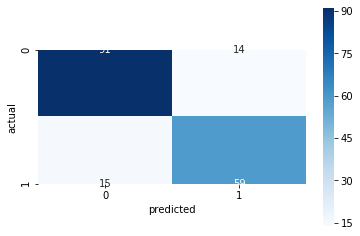

In [95]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_dt1)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

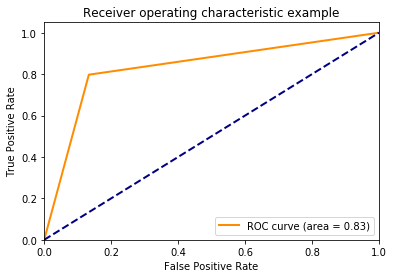

In [96]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt1)
roc_auc1 = auc(fpr, tpr)
performance_auc['Decision Tree_1'] = roc_auc1

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `RNK10`

In [97]:
# Split and drop Survived variable
X_ = dataset[0][colsRNK10]
Y_ = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [98]:
X_train.head()

,Sex,SibSp,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_S,FareGroup_A,...,Title_Master,Title_Mr,Title_Mrs,Title_Rare,Deck_B,Deck_D,Deck_E,Deck_G,Deck_N,RoomGroup_r3
331,True,-0.474545,-0.560975,1,True,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
733,True,-0.474545,-0.560975,1,False,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
382,True,-0.474545,-0.560975,1,False,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
704,True,0.432793,0.059160,0,False,0,0,1,1,1,...,0,1,0,0,0,0,0,0,1,0
813,False,3.154809,3.159833,0,False,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
model2 = DecisionTreeClassifier().fit(X_train, y_train)
model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
predicted_dt2 = model2.predict(X_test)
predicted_dt2

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1])

In [101]:
# Confidence score
dectree_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(dectree_score2)
print(classification_report(y_test, predicted_dt2))

92.28
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

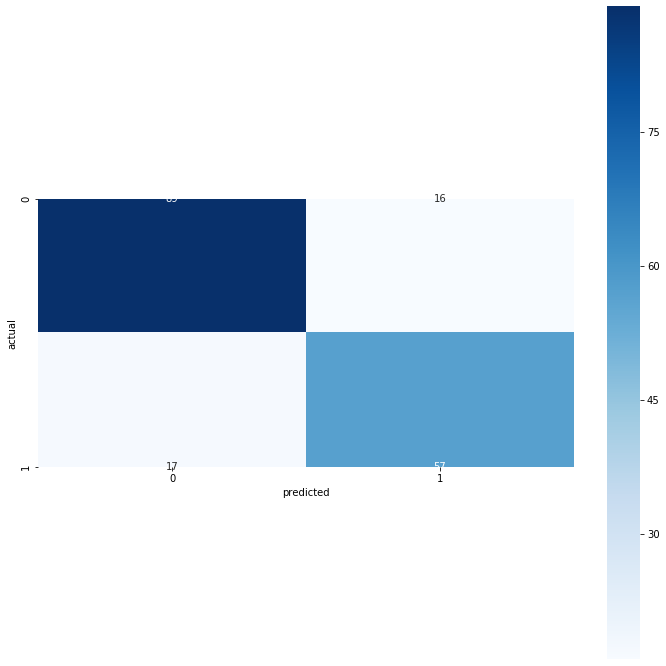

In [102]:
# Create a confusion matrix
plt.figure(figsize=(12,12))
matrix = confusion_matrix(y_test, predicted_dt2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

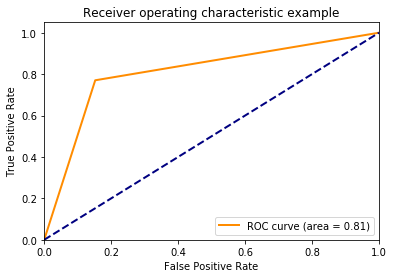

In [103]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Decision Tree_2'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `RNK15`

In [104]:
# Split and drop Survived variable
X_ = dataset[0][colsRNK15]
Y_ = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [105]:
X_train.head()

,Sex,SibSp,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_S,FareGroup_A,...,Title_Mrs,Title_Rare,Deck_B,Deck_C,Deck_D,Deck_E,Deck_G,Deck_N,RoomGroup_r3,RoomGroup_r4
331,True,-0.474545,-0.560975,1,True,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
733,True,-0.474545,-0.560975,1,False,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
382,True,-0.474545,-0.560975,1,False,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
704,True,0.432793,0.059160,0,False,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
813,False,3.154809,3.159833,0,False,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [106]:
model3 = DecisionTreeClassifier().fit(X_train, y_train)
model3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
predicted_dt3 = model3.predict(X_test)
predicted_dt3

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1])

In [108]:
# Confidence score
dectree_score3 = round(model3.score(X_train,y_train) * 100, 2)
print(dectree_score3)
print(classification_report(y_test, predicted_dt3))

92.7
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

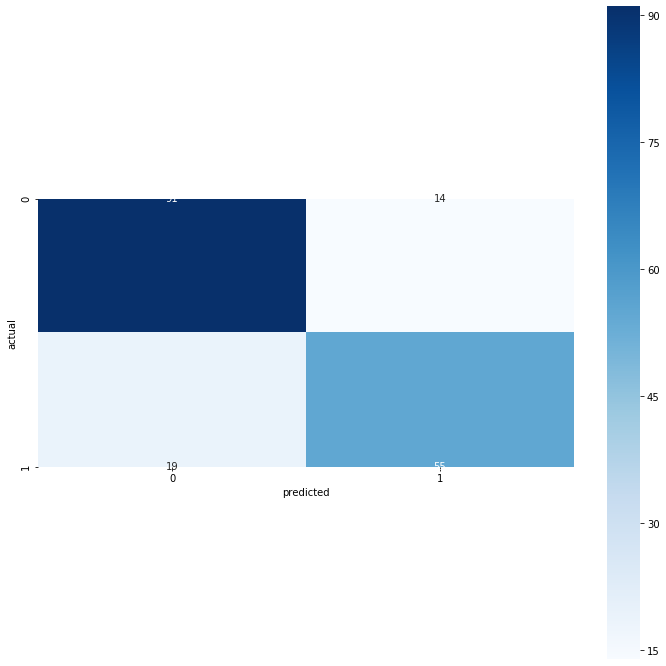

In [109]:
# Create a confusion matrix
plt.figure(figsize=(12,12))
matrix = confusion_matrix(y_test, predicted_dt3)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

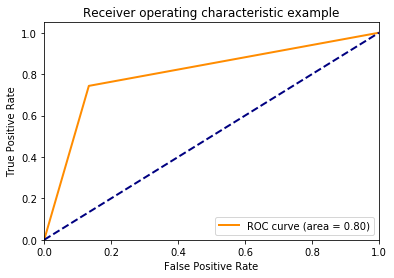

In [110]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt3)
roc_auc3 = auc(fpr, tpr)
performance_auc['Decision Tree_3'] = roc_auc3

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `SPT`

In [111]:
# Split and drop Survived variable
X_ = dataset[0][colsSPT]
Y_ = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [112]:
X_train.head()

,Sex,FamilySize,InCabin,Pclass_3,FareGroup_A,FareGroup_B,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Senior,Title_Master,Title_Mr,Title_Mrs,Title_Rare,Deck_B,Deck_D,Deck_E,Deck_G
331,True,-0.560975,True,0,0,0,1,0,0,0,1,0,0,0,0,0,0
733,True,-0.560975,False,0,0,1,0,0,0,0,1,0,0,0,0,0,0
382,True,-0.560975,False,1,0,1,0,0,0,0,1,0,0,0,0,0,0
704,True,0.059160,False,1,1,0,0,0,0,0,1,0,0,0,0,0,0
813,False,3.159833,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
model4 = DecisionTreeClassifier().fit(X_train, y_train)
model4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
predicted_dt4 = model4.predict(X_test)
predicted_dt4

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [115]:
# Confidence score
dectree_score4 = round(model4.score(X_train,y_train) * 100, 2)
print(dectree_score4)
print(classification_report(y_test, predicted_dt4))

88.76
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

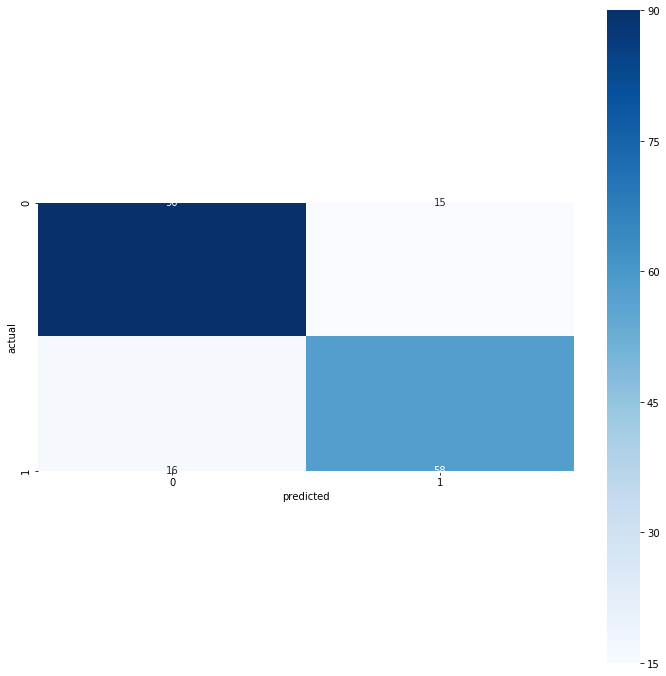

In [116]:
# Create a confusion matrix
plt.figure(figsize=(12,12))
matrix = confusion_matrix(y_test, predicted_dt4)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

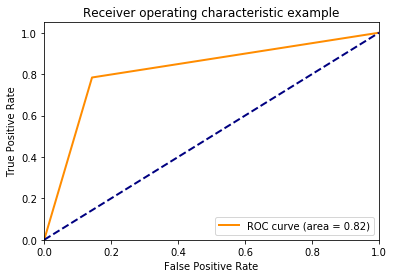

In [117]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_dt4)
roc_auc4 = auc(fpr, tpr)
performance_auc['Decision Tree_4'] = roc_auc4

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [118]:
performance_auc

{'Decision Tree_1': 0.831981981981982,
 'Decision Tree_2': 0.8089446589446588,
 'Decision Tree_3': 0.8049549549549551,
 'Decision Tree_4': 0.8204633204633205}

## Conclusion and Model Evaluation

Después de aplicar diferentes modelos de clasificación, y viendo que no hay demasiadas diferencias de rendimiento entre ellos, el que mejor resultado nos ha dado con la métrica que hemos escogido ha sido el de Support Vector Machines.


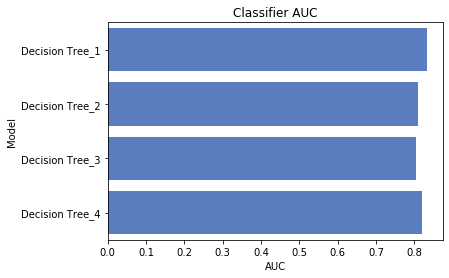

In [119]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [120]:
models = pd.DataFrame({
    'Model': ['colsRNK5', 'colsRNK10', 
             'colsRNK15','colsSPT'],
    'Score': [dectree_score1, 
              dectree_score2, 
              dectree_score3, 
              dectree_score4
             ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,colsRNK15,92.70
1,colsRNK10,92.28
0,colsRNK5,90.31
3,colsSPT,88.76


## Validation with Decision Tree model

In [125]:
# Testing with Decision Tree
X_val = dataset[1][colsRNK5]
predicted_DT = model1.predict(X_val)
predicted_DT

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [126]:
len(predicted_DT)

418

In [130]:
# We submit predicted random forest results
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predicted_DT
    })
submission.to_csv('submission_DT.csv', index=False)

In [131]:
pd.read_csv("submission_DT.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


* * * 

## Kaggle Submission

https://github.com/Kaggle/kaggle-api

In [134]:
import kaggle

In [136]:
!chmod 600 ~/.kaggle/kaggle.json

In [135]:
!kaggle competitions submit titanic -f submission_DT.csv -m "DecisionTree colsRNK5"

100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 22.9kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [137]:
!kaggle competitions submissions titanic

fileName                      date                 description                            status    publicScore  privateScore  
----------------------------  -------------------  -------------------------------------  --------  -----------  ------------  
submission_DT.csv             2020-04-12 15:10:07  DecisionTree colsRNK5                  complete  0.75119      None          
submission_LR.csv             2020-04-12 13:37:57  LogisticRegression colsSPT             complete  0.78468      None          
evaluation_submission_nn.csv  2020-03-31 17:32:19  submit NN results                      complete  0.22966      None          
k_neighbours.csv              2020-03-07 16:54:01  test                                   complete  0.77511      None          
titanic_model_15.csv          2020-02-17 20:35:24  first 1.5a                             complete  0.77511      None          
titanic_model_15.csv          2020-02-17 19:40:57  version 1.5                            complete  0.00